In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('HW1 clv_transactions.csv')

In [3]:
# creating bool series True for NaN values
df.isna().head()

,TransactionID,TransactionDate,CustomerID,Amount
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False


In [4]:
df.isna().sum()

TransactionID      0
TransactionDate    0
CustomerID         0
Amount             0
dtype: int64

Since the sum of the null values is zero, it can be interpreted that there are no missing values in the dataset.

In [5]:
max_date = df["TransactionDate"].max()

In [6]:
min_date = df["TransactionDate"].min()

In [7]:
print("The range of dates is " + min_date + " - "  + max_date)

The range of dates is 1/1/2011 - 9/9/2015


In [8]:
n = len(pd.unique(df["CustomerID"]))
print("Number of unique customers in the dataset are " + str(n))

Number of unique customers in the dataset are 1000


In [9]:
df["Amount"].describe()

count    4186.000000
mean        9.028082
std        38.723909
min        -1.000000
25%         3.310000
50%         6.885000
75%        11.690000
max      2033.000000
Name: Amount, dtype: float64

In [10]:
print("Variance is: " + str(df["Amount"].var()))

Variance is: 1499.5411107517461


In [11]:
# Calculate the z-score for each value in the Amount column
z_scores = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

# Identify outliers as values with a z-score greater than 3
outliers = df[np.abs(z_scores) > 3]
print(outliers)

      TransactionID TransactionDate  CustomerID  Amount
23               24       10/7/2011           7  1003.0
211             212       5/14/2014          54  1027.0
4177           4178       8/13/2012        1000  2033.0


In [12]:
#Treating the outliers by removing them
# Remove the outliers from the dataset
df = df[np.abs(z_scores) <= 3]

In [13]:
#Checking if the outliers got removed
df.describe()

,TransactionID,CustomerID,Amount
count,4183.000000,4183.000000,4183.000000
mean,2093.946211,516.282333,8.063244
std,1207.767818,291.279753,6.008447
min,1.000000,1.000000,-1.000000
25%,1048.500000,270.000000,3.310000
50%,2094.000000,522.000000,6.870000
75%,3139.500000,762.500000,11.675000
max,4186.000000,1000.000000,38.350000


<AxesSubplot:xlabel='TransactionDate'>

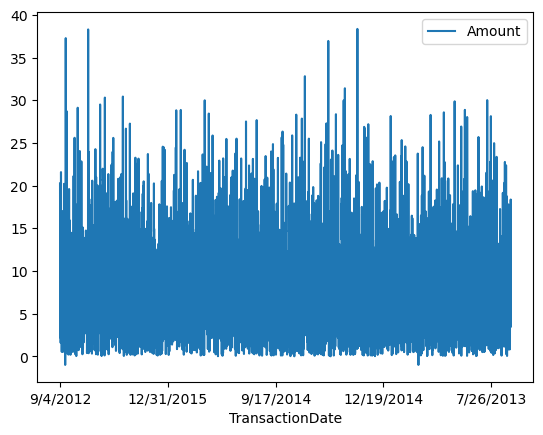

In [14]:
df.plot(x = "TransactionDate", y = "Amount", kind = 'line')

It can be seen that the Transaction amounts in general do not increase over time. A relation does not exist between the transaction date and the transaction amount.

In [15]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
min_dates = df.groupby('CustomerID')['TransactionDate'].min()

# Extract the year from the minimum transaction date and store it in a new column 'OriginYear'
df = df.merge(min_dates, on='CustomerID', suffixes=('', '_min'))
df['OriginYear'] = df['TransactionDate_min'].dt.year

# Drop the 'TransactionDate_min' column
df.drop('TransactionDate_min', axis=1, inplace=True)

# Group the customers by their origin year
grouped_customers = df.groupby('OriginYear')

In [16]:
df.head()

,TransactionID,TransactionDate,CustomerID,Amount,OriginYear
0,1,2012-09-04,1,20.26,2012
1,2,2012-05-15,2,10.87,2012
2,3,2014-05-23,2,2.21,2012
3,4,2014-10-24,2,10.48,2012
4,5,2012-10-13,2,3.94,2012


In [17]:
#Calculating cumulative transaction Amounts
dd = pd.DataFrame()
dd['12'] = df[df['TransactionDate'].dt.year - df['OriginYear'] < 1].groupby('OriginYear').sum()['Amount']
dd['24'] = df[df['TransactionDate'].dt.year - df['OriginYear'] < 2].groupby('OriginYear').sum()['Amount']
dd['36'] = df[df['TransactionDate'].dt.year - df['OriginYear'] < 3].groupby('OriginYear').sum()['Amount']
dd['48'] = df[df['TransactionDate'].dt.year - df['OriginYear'] < 4].groupby('OriginYear').sum()['Amount']
dd['60'] = df[df['TransactionDate'].dt.year - df['OriginYear'] < 5].groupby('OriginYear').sum()['Amount']
dd['72'] = df[df['TransactionDate'].dt.year - df['OriginYear'] < 6].groupby('OriginYear').sum()['Amount']

is_duplicate = dd.apply(pd.Series.duplicated, axis=1)
new_display = dd.where(~is_duplicate, np.nan)
pd.set_option('display.precision', 2)

print(new_display.fillna(''))

                 12       24       36       48       60       72
OriginYear                                                      
2010        2259.67  3614.78  5274.81  6632.37  7930.69  8964.49
2011        2238.46   3756.9  5464.99  6702.11  7861.24         
2012        2181.35  3874.69  5226.86  6501.85                  
2013        2179.85  3608.81  5226.75                           
2014        1830.85  3262.05                                    
2015        1912.17                                             


In [18]:
cust = pd.DataFrame()

#Keeping only first transaction from each customer id to count the no of customers
cust = df.groupby('CustomerID').first().reset_index()
#Assigning the value to all age groups as the count is age independent 
cust = cust.groupby('OriginYear').count()
cust['12'] =  cust['CustomerID']
cust['24'] =  cust['CustomerID']
cust['36'] =  cust['CustomerID']
cust['48'] =  cust['CustomerID']
cust['60'] =  cust['CustomerID']
cust['72'] =  cust['CustomerID']

cust = cust.drop(['TransactionID', 'CustomerID', 'Amount', 'TransactionDate'], axis = 1)
is_dup = cust.apply(pd.Series.duplicated, axis=1)
new_disp = cust.where(~is_duplicate, np.nan)

print(new_disp.fillna(''))


             12     24     36     48     60     72
OriginYear                                        
2010        172  172.0  172.0  172.0  172.0  172.0
2011        170  170.0  170.0  170.0  170.0       
2012        163  163.0  163.0  163.0              
2013        180  180.0  180.0                     
2014        155  155.0                            
2015        160                                   


In [19]:
#Calculate historic clv by using the above two data frames
historic_clv = new_display/new_disp
print(historic_clv.fillna(''))

               12     24     36     48     60     72
OriginYear                                          
2010        13.14  21.02  30.67  38.56  46.11  52.12
2011        13.17   22.1  32.15  39.42  46.24       
2012        13.38  23.77  32.07  39.89              
2013        12.11  20.05  29.04                     
2014        11.81  21.05                            
2015        11.95                                   


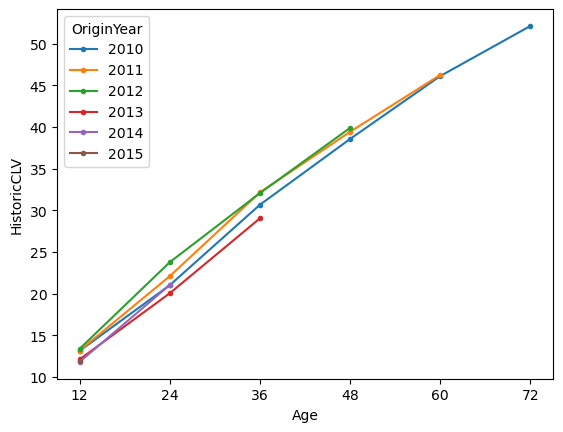

In [20]:
#Plotting the Historic CLV data for each cohort 
plot_clv = historic_clv.transpose()
fig,ax = plt.subplots()
plot_clv.plot(style='.-', kind='line', ax = ax)
plt.xlabel('Age')
plt.ylabel('HistoricCLV')
plt.show()

In [21]:
#Calculate the weighted avg CLV
cumulative_clv = dd.sum()/cust.sum()
df_cumulative_clv = pd.DataFrame({'Age':cumulative_clv.index, 'HistoricCLV':cumulative_clv.values})
df_cumulative_clv = df_cumulative_clv.set_index('Age')
print(df_cumulative_clv)

     HistoricCLV
Age             
12         12.60
24         20.03
36         26.37
48         30.24
60         32.69
72         33.73


In [22]:
#Find out customer spending per year
maxAmt = dd.max(axis=1)
print(maxAmt)

OriginYear
2010    8964.49
2011    7861.24
2012    6501.85
2013    5226.75
2014    3262.05
2015    1912.17
dtype: float64


In [23]:
print("Customers acquired in 2011 have spent: " + str(maxAmt[2011]))

Customers acquired in 2011 have spent: 7861.24


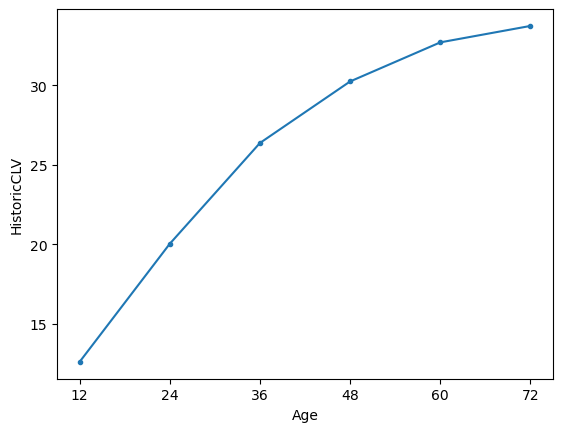

In [24]:
#Plotting the weighted avg CLV
cumulative_clv.plot(style='.-', kind='line')
plt.xlabel('Age')
plt.ylabel('HistoricCLV')
plt.show()

It can be seen from the graph that each group does not exhibit similar pattern of spending as the age increases, the upward trend of HistoricCLV can be seen to get flattened. The slope of the curve is decreasing which signifies that not all age groups have similar pattern of spending.